In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv('D:/Swastick College/7th Sem/Adv Data MIning/ADM LAB/Stock Market Data/ADANIPORTS copy.csv')

# Basic data checks
data['Date'] = pd.to_datetime(data['Date'])
data['Trades'] = data['Trades'].fillna(data['Trades'].median())
data = data.sort_values(by='Date')

# Display the first few rows
data.head()


c:\Python311\Lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Python311\Lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
c:\Python311\Lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-246-g3d31191b-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
C:\Users\IDEAPAD GAMING\AppData\Local\Temp\ipykernel_6936\1077062093.py:7: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['Date'] = pd.to_datetime(data['Date'])


,Date,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2007-11-27,440.00,770.00,1050.00,770.0,959.0,962.90,984.72,27294366,2.687720e+15,35881.5,9859619,0.3612
1,2007-11-28,962.90,984.00,990.00,874.0,885.0,893.90,941.38,4581338,4.312770e+14,35881.5,1453278,0.3172
2,2007-11-29,893.90,909.00,914.75,841.0,887.0,884.20,888.09,5124121,4.550660e+14,35881.5,1069678,0.2088
3,2007-11-30,884.20,890.00,958.00,890.0,929.0,921.55,929.17,4609762,4.283260e+14,35881.5,1260913,0.2735
4,2007-12-03,921.55,939.75,995.00,922.0,980.0,969.30,965.65,2977470,2.875200e+14,35881.5,816123,0.2741


In [2]:
# Moving Averages
data['SMA_20'] = data['Close'].rolling(window=20).mean()   
data['EMA_20'] = data['Close'].ewm(span=20, adjust=False).mean()

# RSI
def calculate_rsi(data, window=14):
    delta = data['Close'].diff(1)
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=window).mean()
    avg_loss = loss.rolling(window=window).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

data['RSI'] = calculate_rsi(data)

# MACD
data['EMA_12'] = data['Close'].ewm(span=12, adjust=False).mean()
data['EMA_26'] = data['Close'].ewm(span=26, adjust=False).mean()
data['MACD'] = data['EMA_12'] - data['EMA_26']
data['Signal_Line'] = data['MACD'].ewm(span=9, adjust=False).mean()

# Drop NaN values generated by indicator calculations
data = data.dropna()

# Display the first few rows with technical indicators
data[['Date', 'Close', 'SMA_20', 'EMA_20', 'RSI', 'MACD', 'Signal_Line']].head()


,Date,Close,SMA_20,EMA_20,RSI,MACD,Signal_Line
19,2007-12-26,1199.90,1047.1375,1064.576689,66.074871,42.407648,32.028800
20,2007-12-27,1211.65,1059.5750,1078.583671,63.934426,48.788798,35.380800
21,2007-12-28,1249.10,1077.3350,1094.823321,66.783357,56.219741,39.548588
22,2007-12-31,1268.80,1096.5650,1111.392529,66.690070,62.972533,44.233377
23,2008-01-01,1296.85,1115.3300,1129.055145,72.164948,69.783154,49.343332


In [3]:
from sklearn.preprocessing import MinMaxScaler

features_to_normalize = ['Open', 'High', 'Low', 'Close', 'VWAP', 'Volume', 'Turnover', 'SMA_20', 'EMA_20', 'RSI', 'MACD']
scaler = MinMaxScaler()
data[features_to_normalize] = scaler.fit_transform(data[features_to_normalize])

# Define the target using a rolling window
window_size = 5
data['Target'] = data['Close'].shift(-window_size)
data = data.dropna()

# Split data into features and target
X = data[features_to_normalize]
y = data['Target']

# Display the first few rows after scaling and target definition
X.head(), y.head()


(        Open      High       Low     Close      VWAP    Volume  Turnover  \
 19  0.887503  0.909357  0.895221  0.910334  0.900445  0.014888  0.021242   
 20  0.920774  0.930782  0.943316  0.920130  0.933348  0.009878  0.014614   
 21  0.899480  0.958799  0.918409  0.951353  0.932284  0.011788  0.017392   
 22  0.960990  0.976103  0.992270  0.967777  0.979469  0.007419  0.011513   
 23  0.974007  0.995880  0.994589  0.991163  0.986237  0.004902  0.007712   
 
       SMA_20    EMA_20       RSI      MACD  
 19  0.879103  0.895416  0.680054  0.864226  
 20  0.890803  0.908607  0.657195  0.890011  
 21  0.907509  0.923901  0.687620  0.920038  
 22  0.925599  0.939505  0.686624  0.947325  
 23  0.943251  0.956139  0.745094  0.974846  ,
 19    1.000000
 20    0.973613
 21    0.944058
 22    0.933136
 23    0.914419
 Name: Target, dtype: float64)

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}
xgb_grid = GridSearchCV(XGBRegressor(random_state=42), param_grid, cv=3, scoring='neg_mean_squared_error')
xgb_grid.fit(X_train, y_train)
best_xgb_model = xgb_grid.best_estimator_

# Predictions and Evaluation for XGBoost
y_pred_xgb = best_xgb_model.predict(X_test)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)

print(f"XGBoost Mean Squared Error: {mse_xgb}")
print(f"XGBoost R^2 Score: {r2_xgb}")
print(f"XGBoost Mean Absolute Error: {mae_xgb}")


XGBoost Mean Squared Error: 0.000829119806687988
XGBoost R^2 Score: 0.9619060411924967
XGBoost Mean Absolute Error: 0.012082316260901893


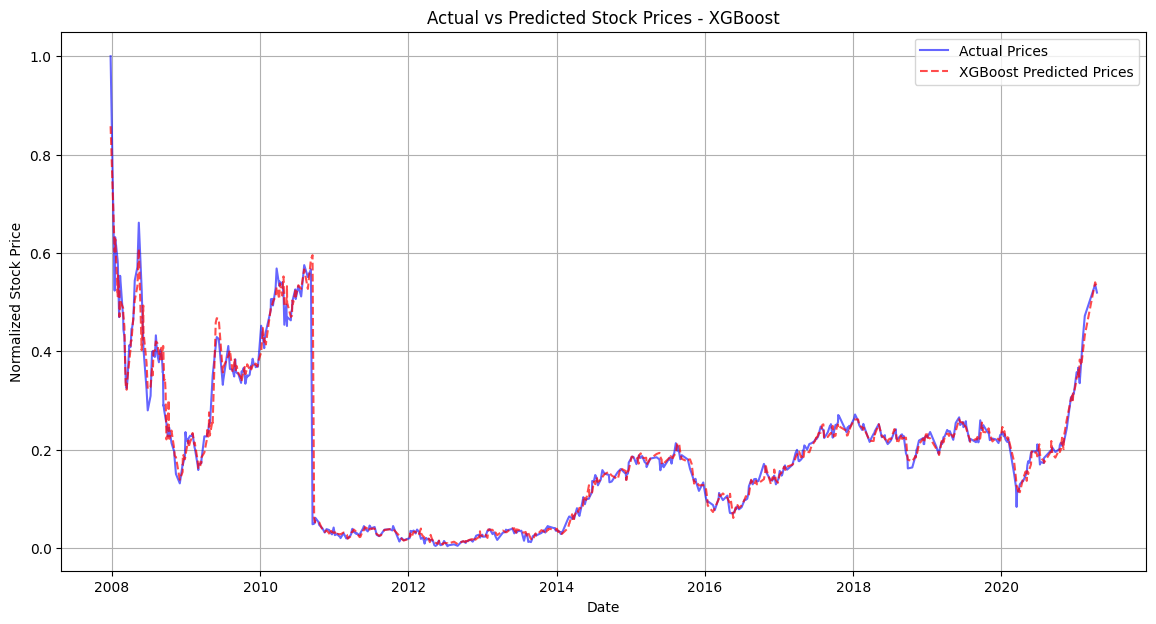

In [7]:
import matplotlib.pyplot as plt

xgb_results = pd.DataFrame({
    'Date': data['Date'][y_test.index],
    'Actual': y_test,
    'Predicted': y_pred_xgb
}).sort_values(by='Date')

plt.figure(figsize=(14, 7))
plt.plot(xgb_results['Date'], xgb_results['Actual'], label='Actual Prices', color='blue', alpha=0.6)
plt.plot(xgb_results['Date'], xgb_results['Predicted'], label='XGBoost Predicted Prices', color='red', linestyle='--', alpha=0.7)
plt.title("Actual vs Predicted Stock Prices - XGBoost")
plt.xlabel("Date")
plt.ylabel("Normalized Stock Price")
plt.legend()
plt.grid(True)
plt.show()


In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import StackingRegressor, RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor

base_models = [
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('et', ExtraTreesRegressor(n_estimators=100, random_state=42)),
    ('gb', GradientBoostingRegressor(n_estimators=100, random_state=42))
]
meta_model = LinearRegression()
stacking_model = StackingRegressor(estimators=base_models, final_estimator=meta_model)
stacking_model.fit(X_train, y_train)

# Predictions and Evaluation for Stacking
y_pred_stack = stacking_model.predict(X_test)
mse_stack = mean_squared_error(y_test, y_pred_stack)
r2_stack = r2_score(y_test, y_pred_stack)
mae_stack = mean_absolute_error(y_test, y_pred_stack)

print(f"Stacking Mean Squared Error: {mse_stack}")
print(f"Stacking R^2 Score: {r2_stack}")
print(f"Stacking Mean Absolute Error: {mae_stack}")


Stacking Mean Squared Error: 0.0007462262140669439
Stacking R^2 Score: 0.9657145922332998
Stacking Mean Absolute Error: 0.011604495741885656


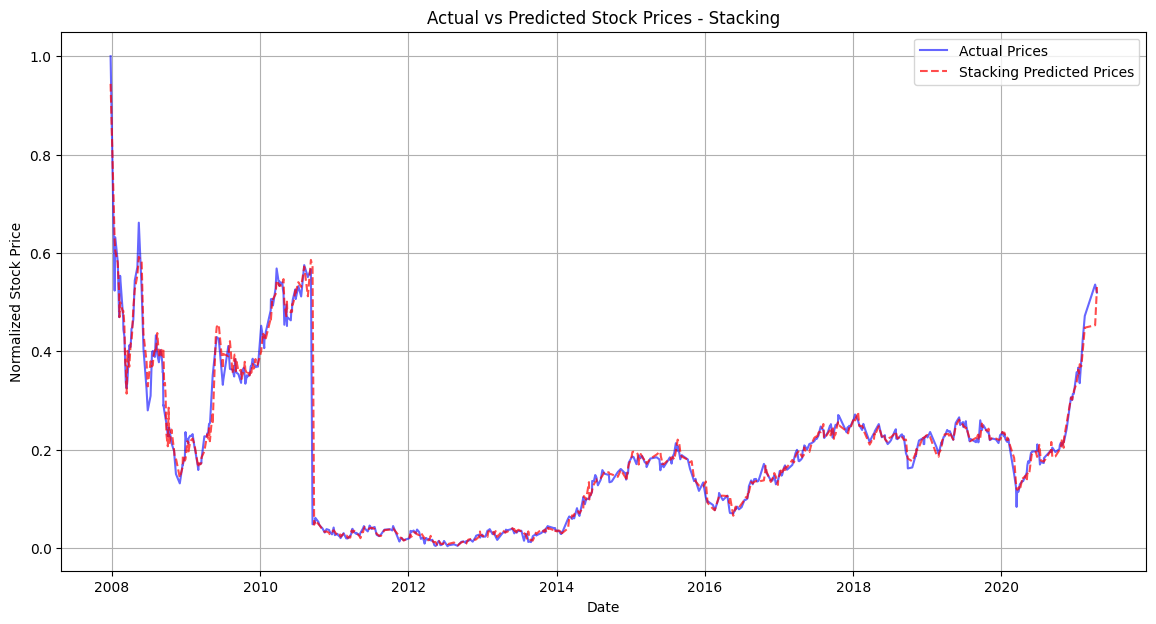

In [9]:
stacking_results = pd.DataFrame({
    'Date': data['Date'][y_test.index],
    'Actual': y_test,
    'Predicted': y_pred_stack
}).sort_values(by='Date')

plt.figure(figsize=(14, 7))
plt.plot(stacking_results['Date'], stacking_results['Actual'], label='Actual Prices', color='blue', alpha=0.6)
plt.plot(stacking_results['Date'], stacking_results['Predicted'], label='Stacking Predicted Prices', color='red', linestyle='--', alpha=0.7)
plt.title("Actual vs Predicted Stock Prices - Stacking")
plt.xlabel("Date")
plt.ylabel("Normalized Stock Price")
plt.legend()
plt.grid(True)
plt.show()


c:\Python311\Lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Python311\Lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
c:\Python311\Lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-246-g3d31191b-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
C:\Users\IDEAPAD GAMING\AppData\Local\Temp\ipykernel_12208\3933526242.py:9: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['Date'] = pd.to_datetime(data['Date'])


Random Forest Mean Squared Error: 0.0002734351353917677
Random Forest R^2 Score: 0.9902536815881949
Random Forest Mean Absolute Error: 0.011595462885579359


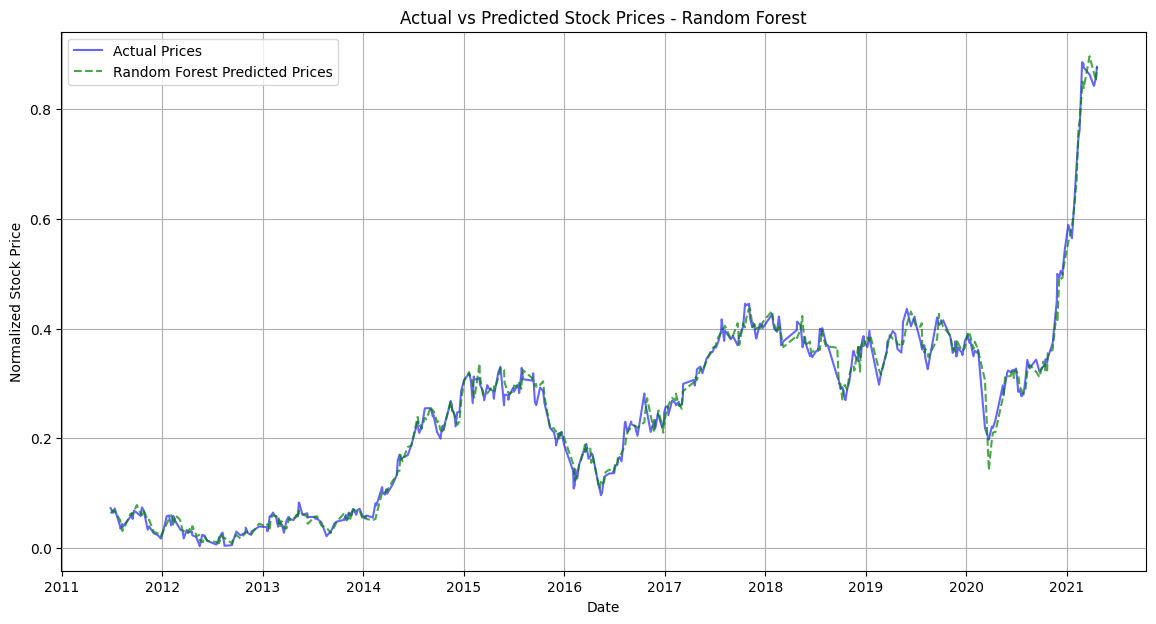

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load the dataset
data = pd.read_csv('D:/Swastick College/7th Sem/Adv Data MIning/ADM LAB/Stock Market Data/ADANIPORTS copy.csv')
data['Date'] = pd.to_datetime(data['Date'])
data = data.sort_values(by='Date')

# Basic feature engineering and normalization (Assuming you already have it)
# Step 3: Feature Engineering - Adding Technical Indicators
data['SMA_20'] = data['Close'].rolling(window=20).mean()
data['EMA_20'] = data['Close'].ewm(span=20, adjust=False).mean()

# RSI Calculation
def calculate_rsi(data, window=14):
    delta = data['Close'].diff(1)
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=window).mean()
    avg_loss = loss.rolling(window=window).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

data['RSI'] = calculate_rsi(data)
data['EMA_12'] = data['Close'].ewm(span=12, adjust=False).mean()
data['EMA_26'] = data['Close'].ewm(span=26, adjust=False).mean()
data['MACD'] = data['EMA_12'] - data['EMA_26']
data['Signal_Line'] = data['MACD'].ewm(span=9, adjust=False).mean()
data = data.dropna()  # Drop NaN values generated by indicator calculations
                                                

# Example: Normalize specific columns
from sklearn.preprocessing import MinMaxScaler
features_to_normalize = ['Open', 'High', 'Low', 'Close', 'VWAP', 'Volume', 'Turnover', 'SMA_20', 'EMA_20', 'RSI', 'MACD']
scaler = MinMaxScaler()
data[features_to_normalize] = scaler.fit_transform(data[features_to_normalize])

# Define the target using a rolling window
window_size = 5
data['Target'] = data['Close'].shift(-window_size)
data = data.dropna()

# Split data into features and target
X = data[features_to_normalize]
y = data['Target']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

print(f"Random Forest Mean Squared Error: {mse_rf}")
print(f"Random Forest R^2 Score: {r2_rf}")
print(f"Random Forest Mean Absolute Error: {mae_rf}")

# Create a DataFrame for visualization
rf_results = pd.DataFrame({
    'Date': data['Date'][y_test.index],
    'Actual': y_test,
    'Predicted': y_pred_rf
}).sort_values(by='Date')

# Plot Actual vs Predicted Prices for Random Forest
plt.figure(figsize=(14, 7))
plt.plot(rf_results['Date'], rf_results['Actual'], label='Actual Prices', color='blue', alpha=0.6)
plt.plot(rf_results['Date'], rf_results['Predicted'], label='Random Forest Predicted Prices', color='green', linestyle='--', alpha=0.7)
plt.title("Actual vs Predicted Stock Prices - Random Forest")
plt.xlabel("Date")
plt.ylabel("Normalized Stock Price")
plt.legend()
plt.grid(True)
plt.show()
